In [65]:
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot
import numpy as np

In [66]:
DATA_PATH = "/home/mathuis/Downloads/cyber_wolf/data"
HL_SIZE = 10

In [67]:
def load_data(path: str):
    print("Loading data")
    return np.load(path, allow_pickle=True)


def build_model():
    print("Building model")
    
    input_layer = layers.Input(shape=(98,))
    encoded = layers.Dense(HL_SIZE, activation="relu")(input_layer)
    decoded = layers.Dense(98, activation="sigmoid")(encoded)

    model = keras.Model(input_layer, decoded)    

    return model


def build_encoder():
    print("Building encoder")

    input_layer = layers.Input(shape=(98,))
    encoded = layers.Dense(HL_SIZE, activation="relu")(input_layer)

    encoder = keras.Model(input_layer, encoded)
    return encoder


def build_decoder():
    print("Building decoder")

    encoded_input = layers.Input(shape=(HL_SIZE,))
    decoded_layer = build_model().layers[-1]
    
    decoder = keras.Model(encoded_input, decoded_layer(encoded_input))
    return decoder


def train_model(model, x_train, x_test):
    print("Compiling model")
    model.compile(optimizer="adam", loss="mean_squared_logarithmic_error", metrics=["accuracy"])
    print("Training model")
    return model.fit(x_train, x_train, epochs=7, validation_data=(x_test, x_test))


def plot(history):
    pyplot.subplot(211)
    pyplot.title("loss")
    pyplot.plot(history.history["loss"], label="train")
    pyplot.plot(history.history["val_loss"], label="test")
    pyplot.legend()

    pyplot.subplot(212)
    pyplot.title("accuracy")
    pyplot.plot(history.history["accuracy"], label="train")
    pyplot.plot(history.history["val_accuracy"], label="test")
    pyplot.legend()

    pyplot.show()

def evaluate_model(model, x_test):
    results = model.evaluate(x_test, x_test)
    print(f"Test Loss: {results}")

In [68]:
x_train = load_data(f"{DATA_PATH}/datasets/x_train.npy")
x_test = load_data(f"{DATA_PATH}/datasets/x_test.npy")
    

Loading data
Loading data


In [69]:
model = build_model()
model.summary()

Building model
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 98)]              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                990       
_________________________________________________________________
dense_15 (Dense)             (None, 98)                1078      
Total params: 2,068
Trainable params: 2,068
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = train_model(model, x_train, x_test)

Compiling model
Training model
Epoch 1/7
290/290 [==============================] - 1s 2ms/step - loss: 0.1308 - accuracy: 0.6126 - val_loss: 0.0129 - val_accuracy: 0.8677
Epoch 2/7
290/290 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 0.8679 - val_loss: 0.0026 - val_accuracy: 0.8677
Epoch 3/7
290/290 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.8739 - val_loss: 0.0016 - val_accuracy: 0.8677
Epoch 4/7
290/290 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.8746 - val_loss: 0.0013 - val_accuracy: 0.8677
Epoch 5/7
290/290 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.8706 - val_loss: 0.0010 - val_accuracy: 0.8677
Epoch 6/7
290/290 [==============================] - 0s 1ms/step - loss: 9.4007e-04 - accuracy: 0.8709 - val_loss: 7.7356e-04 - val_accuracy: 0.8677
Epoch 7/7
290/290 [==============================] - 0s 1ms/step - loss: 7.2206e-04 - accuracy: 0.8791 - val_loss: 

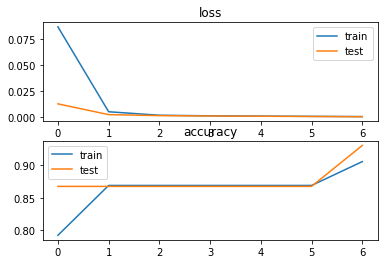

In [71]:
plot(history)

In [72]:
evaluate_model(model, x_test[:1])

1/1 [==============================] - 0s 15ms/step - loss: 1.8089e-04 - accuracy: 1.0000
Test Loss: [0.0001808874512789771, 1.0]


In [75]:
pred = model.predict(x_test[:1])
print(x_test[1])
print(pred[0])

[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.7986433e-05 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e-03 0.0000000e+00
 0.0000000e+00 0.0000000e+00 8.2068116e-04 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [74]:
# model.save(f"{DATA_PATH}/1h-13n-3e-not_overfit-model.h5")